<a href="https://colab.research.google.com/github/nshanbhag2003/HDBSCAN_Computer_Vision/blob/main/FinalProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Randomized Matrix Results

[[-9.177045243863372, 6.717584025624357], [-6.554220304203402, -7.372455319849529], [-2.6969873774267312, 9.231310145632708], [-6.31850946677683, -7.440850018392859], [-8.695212812496697, 7.547836726045997], [-7.2758417212035456, -7.106628685117055], [4.772384208789527, 2.3633877347896757], [4.552010081093097, 2.1160147125454305], [4.678709855967318, 2.360627680153888], [-2.9695950540216716, 9.16456533553659], [-2.7269507128628234, 9.058655164082268], [-6.788643217309619, -6.357252491562975], [-6.670850564904511, -6.761315723982672], [4.19734484662569, 1.4946870343084637], [-2.213810991054586, 9.08283344067431], [-9.266684755860455, 7.516511881595977], [-8.727651436904003, 7.654396215113112], [4.6110747875959675, 2.3745828430975418], [-9.191870731116463, 7.385012957876914], [-8.649032706806592, 7.294391350435954], [-2.694564700177735, 8.827994226770219], [-8.869168440401651, 7.459983705425361], [-9.01693373746282, 7.666082433228092], [4.784437078431467, 2.5883843105271196], [4.62554842

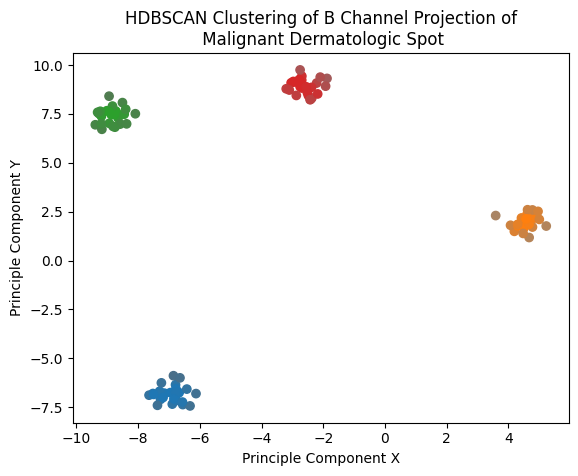

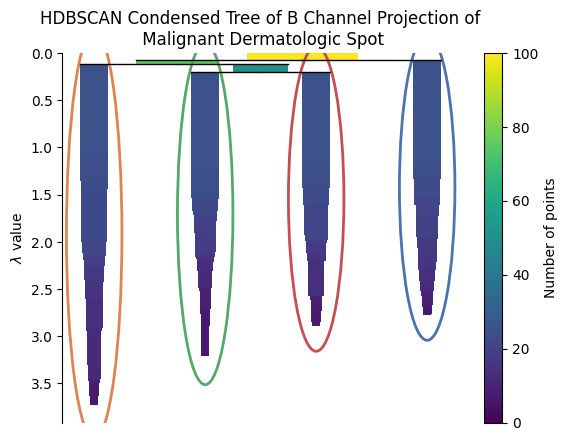

In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from itertools import chain
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")

# Generate synthetic 2D data with 4 clusters
X, _ = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=0.4,
                  random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=["X", "Y"])

# Save to CSV
df.to_csv("synthetic_clusters.csv", index=False, header=False)

projection = np.loadtxt("synthetic_clusters.csv", delimiter=",")
#print(projection)


#/// converting to list
lis = projection.tolist()
print (lis)


#///-------------------------------------clustering algorithm-----------------------------------------------------
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, gen_min_span_tree=True)
clusterer.fit(projection)


palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                zip(clusterer.labels_, clusterer.probabilities_)]


fig = plt.scatter(projection.T[0], projection.T[1], c=cluster_colors)
plt.title('HDBSCAN Clustering of B Channel Projection of\n Malignant Dermatologic Spot')
plt.xlabel('Principle Component X')
plt.ylabel('Principle Component Y')
plt.show()


clusterer.condensed_tree_
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep',8))
plt.title('HDBSCAN Condensed Tree of B Channel Projection of\n Malignant Dermatologic Spot')
plt.show()

Data preview (first 10 points):
[[-1.566104672447485, 9.10157503461424], [-10.327603236973872, 9.97007406484335], [-2.4047658255503723, 8.034451066258434], [4.528147443565176, 2.330169930986778], [-3.1732906475019655, 9.112716746132882], [1.9661362100187607, 4.050966756154297], [1.7261032727447412, 3.729456171081001], [-8.800425477539147, 6.9849420597426475], [2.2143329593338295, 4.1451041818738625], [-9.299774050493681, 9.296674350218389]]


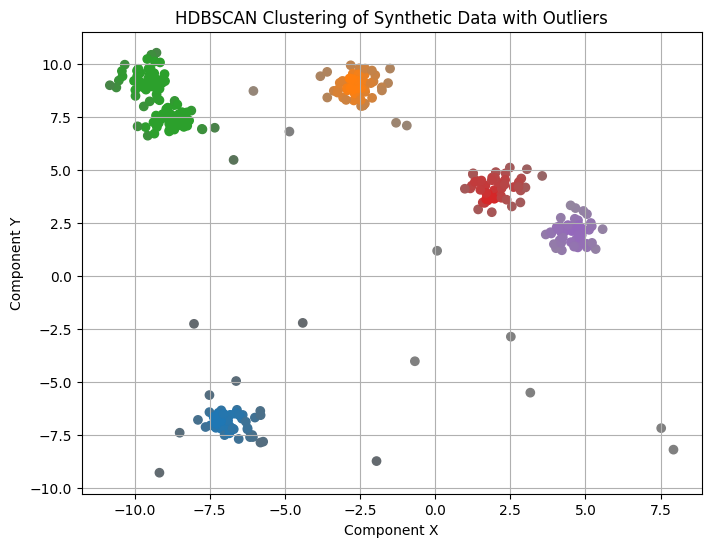

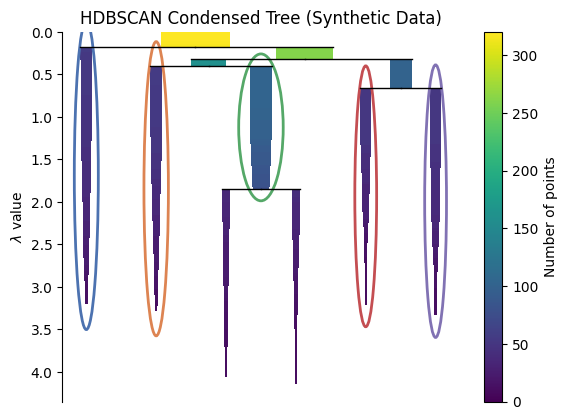

In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")

# Generate synthetic 2D data with 6 clusters
X, _ = make_blobs(n_samples=300, centers=6, n_features=2, cluster_std=0.5,
                  random_state=42)

# Add some random noise/outliers
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))
X = np.vstack([X, outliers])

# Save to CSV
df = pd.DataFrame(X, columns=["X", "Y"])
df.to_csv("synthetic_clusters.csv", index=False, header=False)

# Load the projection
projection = np.loadtxt("synthetic_clusters.csv", delimiter=",")

# Convert to list (optional step)
lis = projection.tolist()
print(f"Data preview (first 10 points):\n{lis[:10]}")

#-------------------------------------Clustering-----------------------------------------------------
clusterer = hdbscan.HDBSCAN(min_cluster_size=8, gen_min_span_tree=True)
clusterer.fit(projection)

# Color mapping
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col % len(palette)], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(projection.T[0], projection.T[1], c=cluster_colors)
plt.title('HDBSCAN Clustering of Synthetic Data with Outliers')
plt.xlabel('Component X')
plt.ylabel('Component Y')
plt.grid(True)
plt.show()

# Condensed tree plot
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 12))
plt.title('HDBSCAN Condensed Tree (Synthetic Data)')
plt.show()


# Deconvoluted Images

## White Square Black Circle

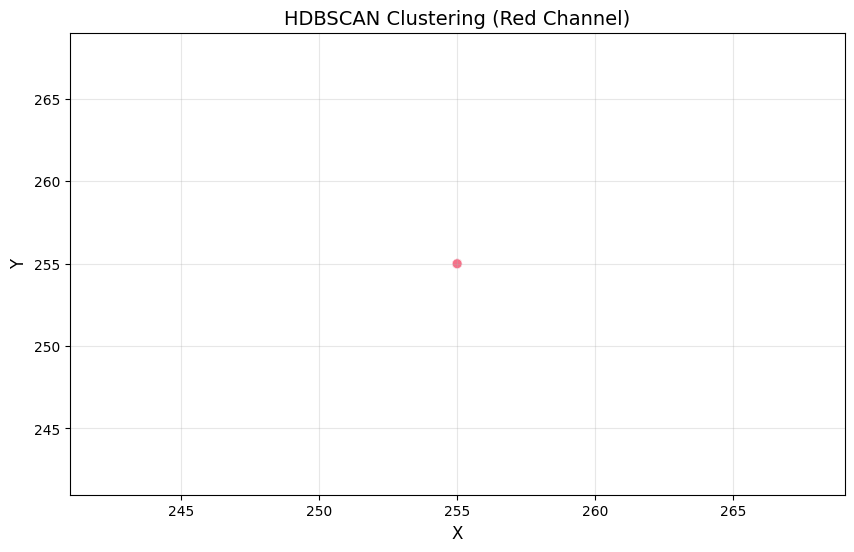

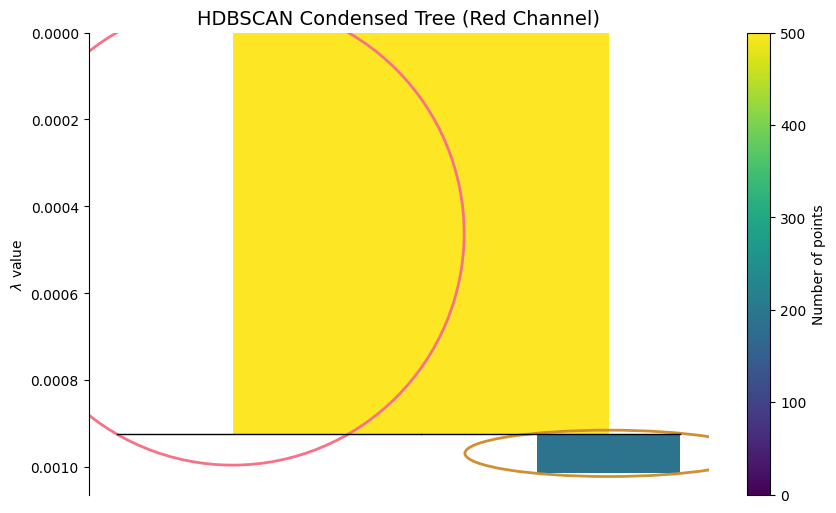


Cluster Membership:
 0    308
 1    191
-1      1
Name: count, dtype: int64

Noise Points: 0.20%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# --- Load Data ---
#projection = pd.read_csv("WhiteSquare_Black_Circle_R.csv")
projection = np.loadtxt("WhiteSquare_Black_Circle_R.csv", delimiter=",")

# --- Clustering ---
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=190,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# --- Plot Clusters ---
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [
    palette[col] if col >= 0 else (0.9, 0.9, 0.9)
    for col in clusterer.labels_
]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering (Red Channel)', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# --- Condensed Tree (for Stability Analysis) ---
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8),
)
plt.title('HDBSCAN Condensed Tree (Red Channel)', fontsize=14)
plt.show()

# --- Additional Diagnostics ---
# Print cluster statistics
cluster_stats = pd.Series(clusterer.labels_).value_counts()
print("\nCluster Membership:")
print(cluster_stats)

# Check % of noise points
noise_ratio = (clusterer.labels_ == -1).mean() * 100
print(f"\nNoise Points: {noise_ratio:.2f}%")

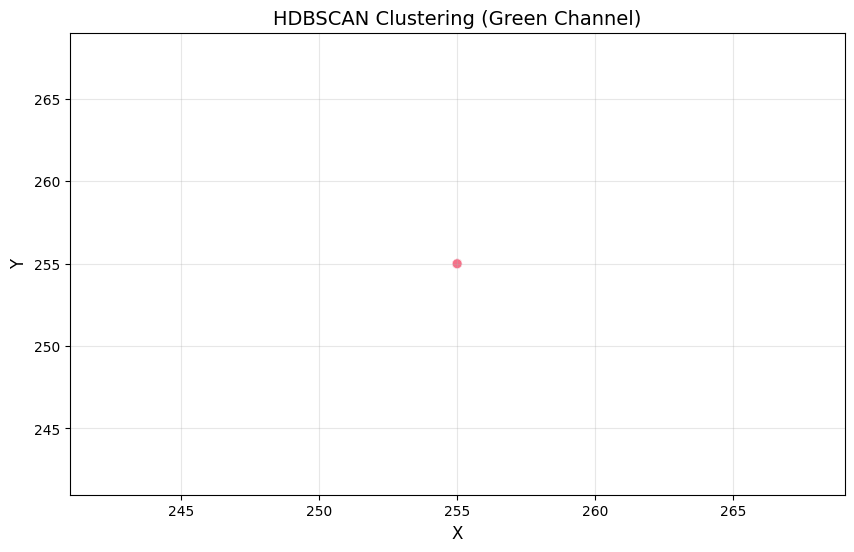

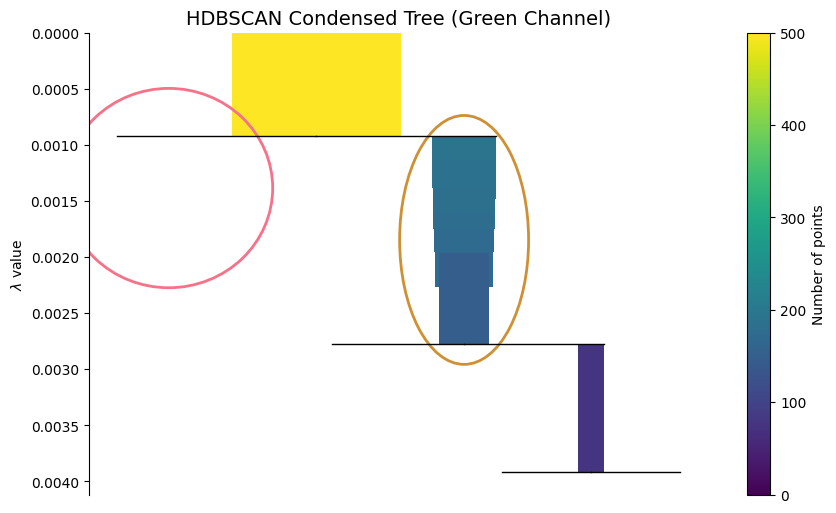


Cluster Membership:
 0    308
 1    191
-1      1
Name: count, dtype: int64

Noise Points: 0.20%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# --- Load Data ---
projection = np.loadtxt("WhiteSquare_Black_Circle_G.csv", delimiter=",")

# --- Clustering ---
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=20,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# --- Plot Clusters ---
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [
    palette[col] if col >= 0 else (0.9, 0.9, 0.9)
    for col in clusterer.labels_
]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering (Green Channel)', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# --- Condensed Tree (Cluster Stability) ---
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8),
)
plt.title('HDBSCAN Condensed Tree (Green Channel)', fontsize=14)
plt.show()

# --- Diagnostics ---
# Cluster membership counts
cluster_stats = pd.Series(clusterer.labels_).value_counts()
print("\nCluster Membership:")
print(cluster_stats)

# Noise ratio
noise_ratio = (clusterer.labels_ == -1).mean() * 100
print(f"\nNoise Points: {noise_ratio:.2f}%")

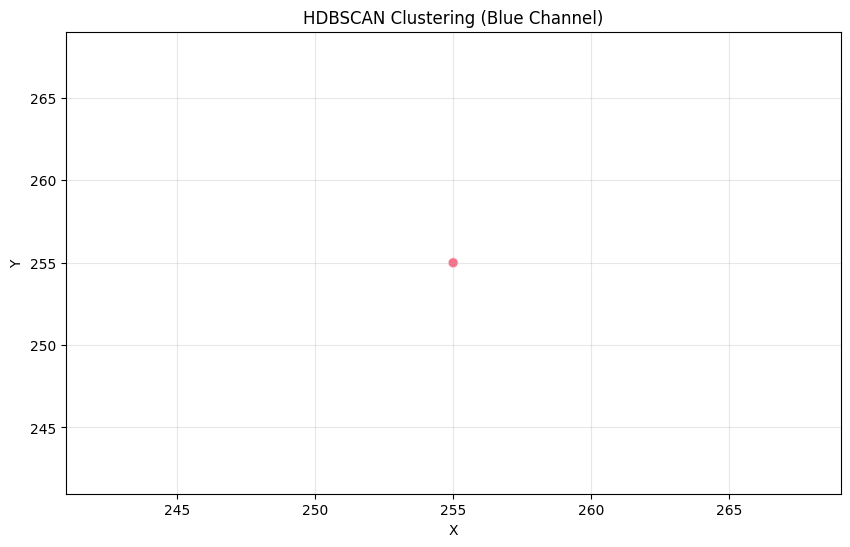

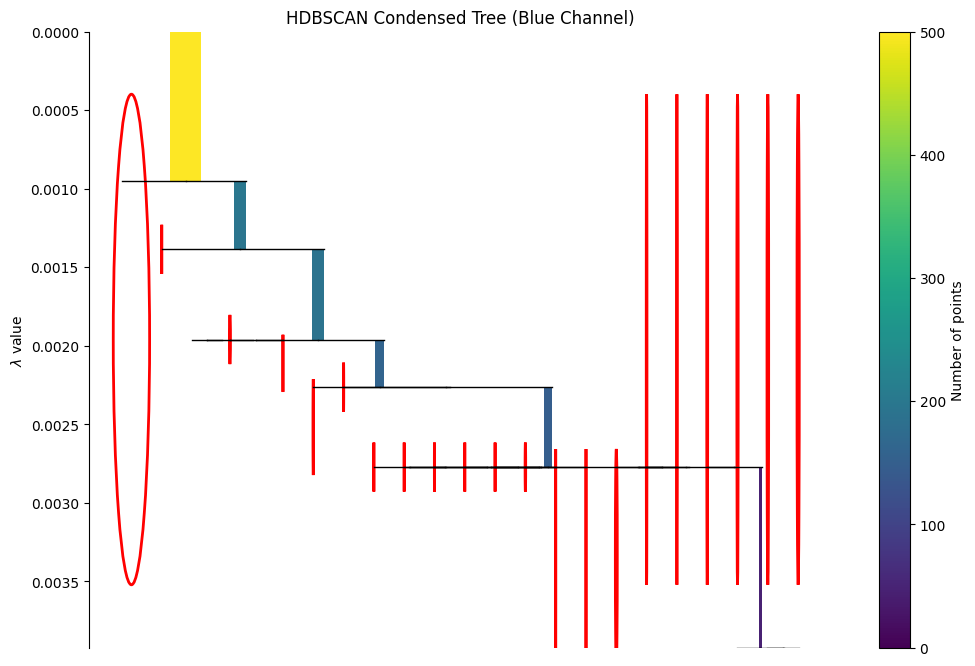


Cluster Membership:
 0     300
-1      74
 12     19
 6      16
 11     14
 10     11
 3       9
 7       8
 9       8
 8       6
 4       5
 2       5
 19      5
 5       3
 17      3
 1       2
 18      2
 15      2
 13      2
 16      2
 14      2
 20      2
Name: count, dtype: int64

Noise Points: 14.80%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("WhiteSquare_Black_Circle_B.csv", delimiter=",")
projection_t = projection.T

# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=2,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection_t)

# Plot clusters
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [palette[col] if col >= 0 else (0.9, 0.9, 0.9) for col in clusterer.labels_]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering (Blue Channel)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()

# Plot condensed tree
plt.figure(figsize=(12, 8))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8)
)
plt.title('HDBSCAN Condensed Tree (Blue Channel)')
plt.show()

# Basic cluster stats
print("\nCluster Membership:")
print(pd.Series(clusterer.labels_).value_counts())
print(f"\nNoise Points: {(clusterer.labels_ == -1).mean()*100:.2f}%")

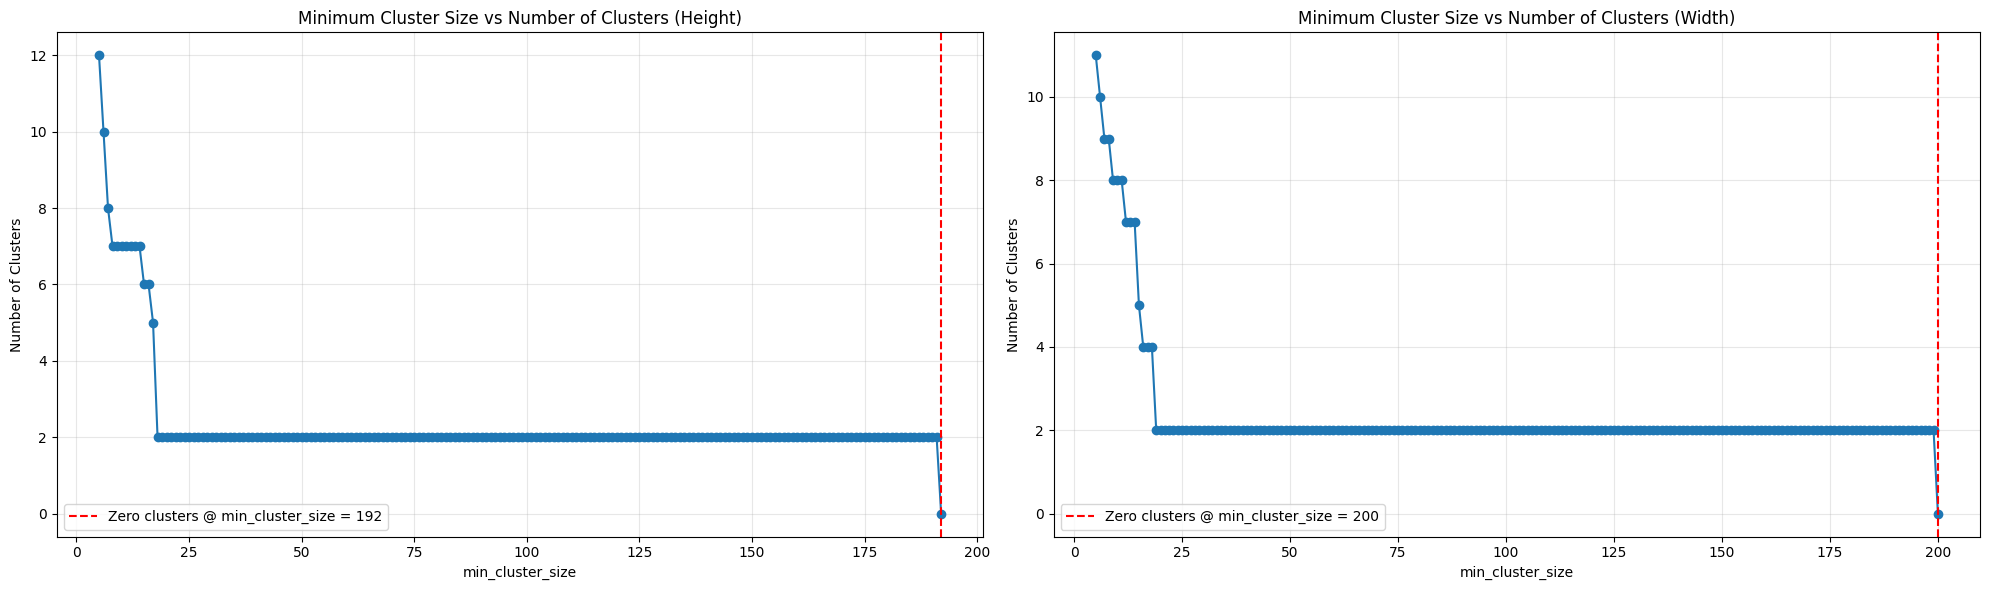

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/WhiteSquare_Black_Circle_R - WhiteSquare_Black_Circle_R.csv",
                        delimiter=",")
projection_t = projection.T

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# First plot (Height)
# Initialize tracking lists
min_cluster_sizes_height = []
n_clusters_height = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_height.append(size)
    n_clusters_height.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax1.plot(min_cluster_sizes_height, n_clusters_height, marker='o', linestyle='-')
ax1.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax1.set_title('Minimum Cluster Size vs Number of Clusters (Height)')
ax1.set_xlabel('min_cluster_size')
ax1.set_ylabel('Number of Clusters')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Second plot (Width)
# Initialize tracking lists
min_cluster_sizes_width = []
n_clusters_width = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection_t)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_width.append(size)
    n_clusters_width.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax2.plot(min_cluster_sizes_width, n_clusters_width, marker='o', linestyle='-')
ax2.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax2.set_title('Minimum Cluster Size vs Number of Clusters (Width)')
ax2.set_xlabel('min_cluster_size')
ax2.set_ylabel('Number of Clusters')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## White Square Black Circle Discolored

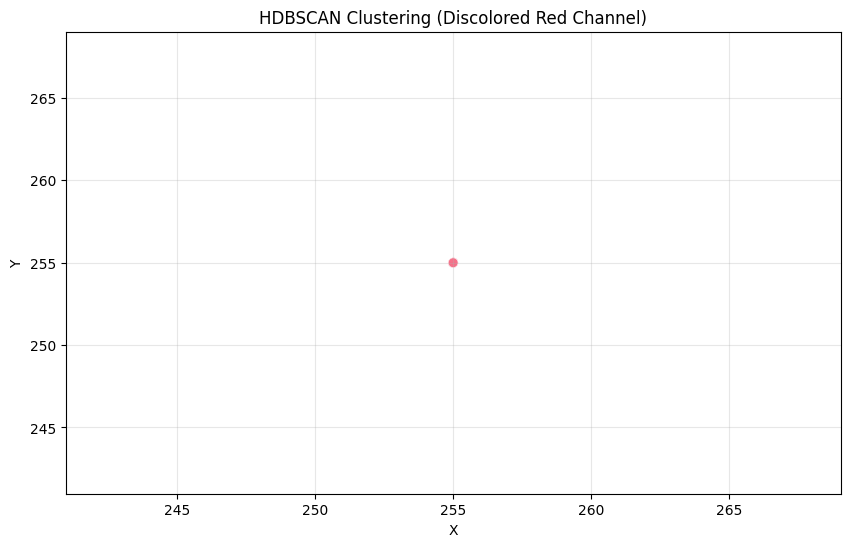

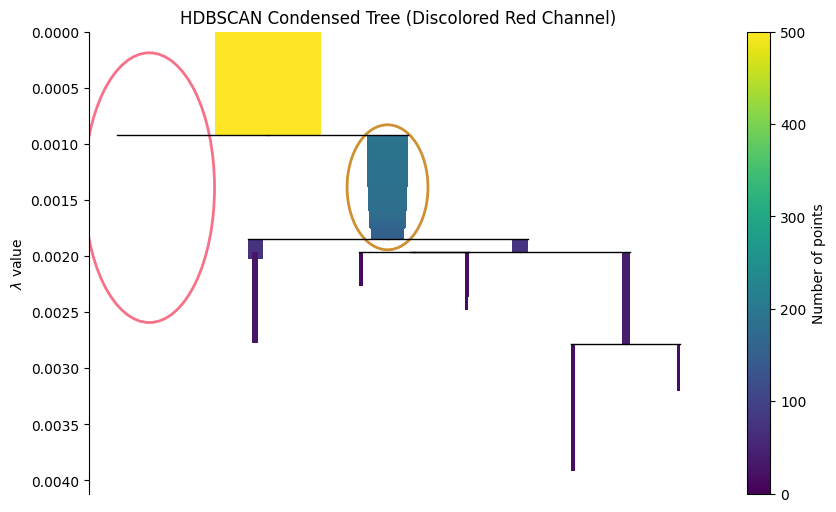


Cluster Membership:
 0    308
 1    191
-1      1
Name: count, dtype: int64

Noise Points: 0.20%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/whitesquareblackcirclediscoloredR.csv", delimiter=",")

# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# Plot clusters
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [palette[col] if col >= 0 else (0.9, 0.9, 0.9) for col in clusterer.labels_]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering (Discolored Red Channel)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()

# Plot condensed tree
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8)
)
plt.title('HDBSCAN Condensed Tree (Discolored Red Channel)')
plt.show()

# Basic cluster stats
print("\nCluster Membership:")
print(pd.Series(clusterer.labels_).value_counts())
print(f"\nNoise Points: {(clusterer.labels_ == -1).mean()*100:.2f}%")

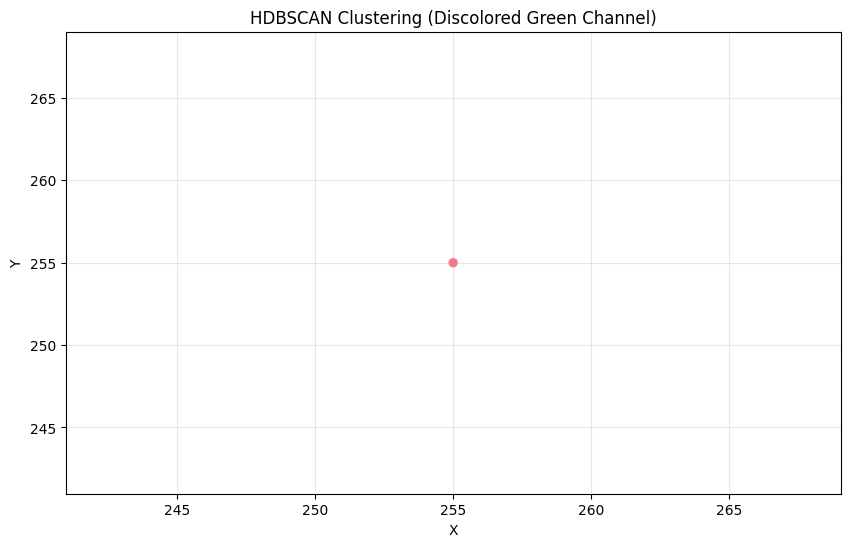

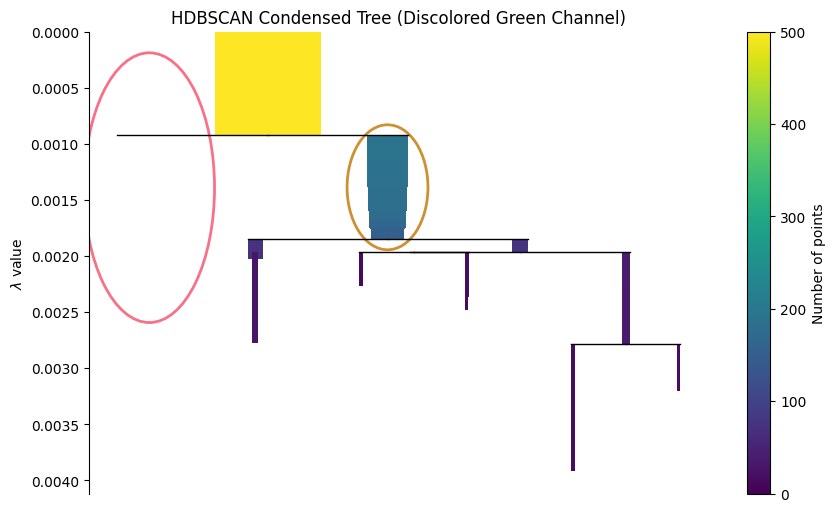


Cluster Membership:
 0    308
 1    191
-1      1
Name: count, dtype: int64

Noise Points: 0.20%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/whitesquareblackcirclediscoloredG.csv", delimiter=",")

# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# Plot clusters
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [palette[col] if col >= 0 else (0.9, 0.9, 0.9) for col in clusterer.labels_]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering (Discolored Green Channel)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()

# Plot condensed tree
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8)
)
plt.title('HDBSCAN Condensed Tree (Discolored Green Channel)')
plt.show()

# Basic cluster stats
print("\nCluster Membership:")
print(pd.Series(clusterer.labels_).value_counts())
print(f"\nNoise Points: {(clusterer.labels_ == -1).mean()*100:.2f}%")

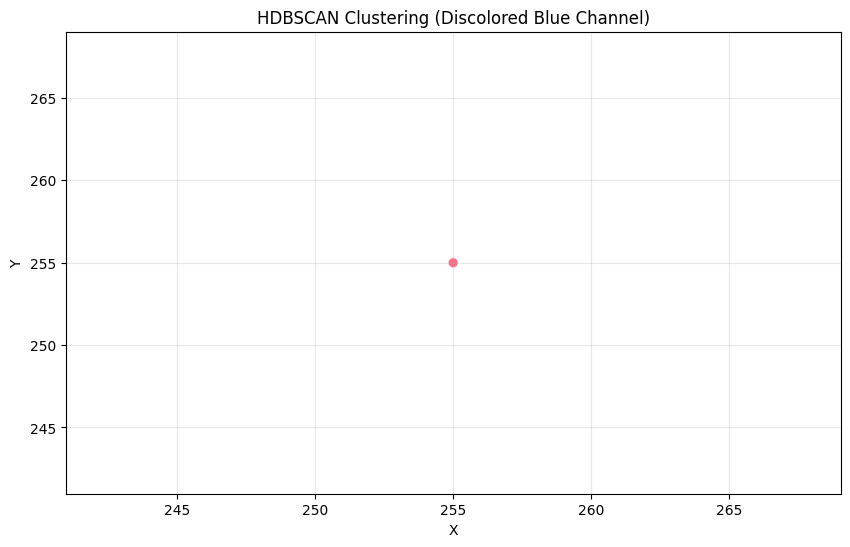

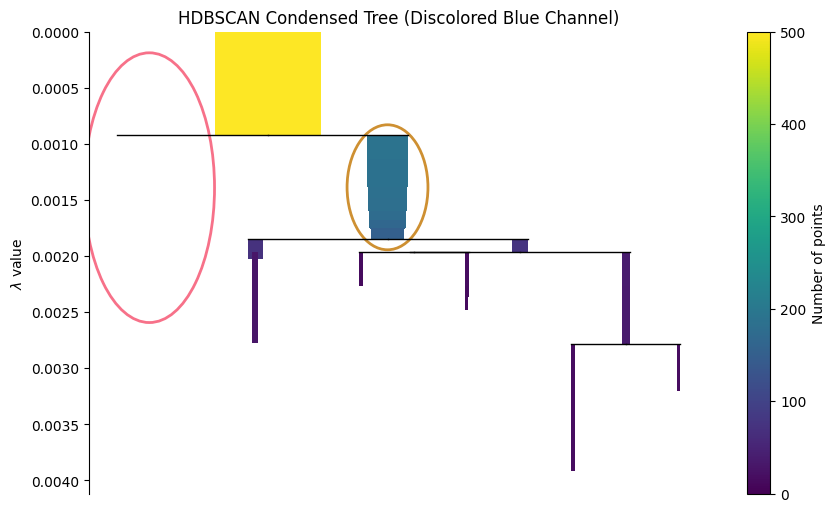


Cluster Membership:
 0    308
 1    191
-1      1
Name: count, dtype: int64

Noise Points: 0.20%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/whitesquareblackcirclediscoloredB.csv", delimiter=",")

# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# Plot clusters
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [palette[col] if col >= 0 else (0.9, 0.9, 0.9) for col in clusterer.labels_]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering (Discolored Blue Channel)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()

# Plot condensed tree
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8)
)
plt.title('HDBSCAN Condensed Tree (Discolored Blue Channel)')
plt.show()

# Basic cluster stats
print("\nCluster Membership:")
print(pd.Series(clusterer.labels_).value_counts())
print(f"\nNoise Points: {(clusterer.labels_ == -1).mean()*100:.2f}%")

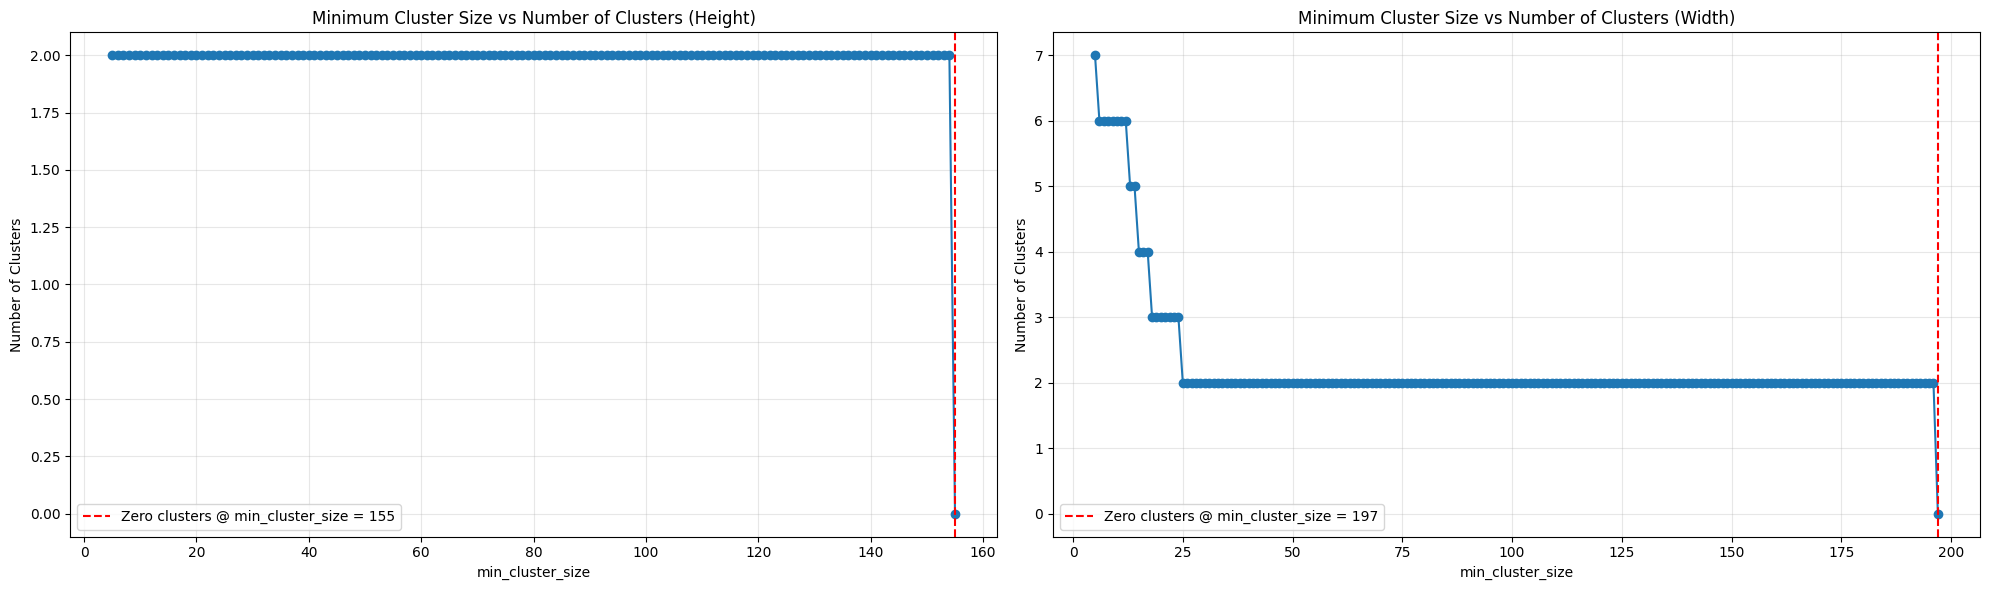

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/BlackRectangle_B.csv",
                        delimiter=",")
projection_t = projection.T

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# First plot (Height)
# Initialize tracking lists
min_cluster_sizes_height = []
n_clusters_height = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_height.append(size)
    n_clusters_height.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax1.plot(min_cluster_sizes_height, n_clusters_height, marker='o', linestyle='-')
ax1.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax1.set_title('Minimum Cluster Size vs Number of Clusters (Height)')
ax1.set_xlabel('min_cluster_size')
ax1.set_ylabel('Number of Clusters')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Second plot (Width)
# Initialize tracking lists
min_cluster_sizes_width = []
n_clusters_width = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection_t)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_width.append(size)
    n_clusters_width.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax2.plot(min_cluster_sizes_width, n_clusters_width, marker='o', linestyle='-')
ax2.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax2.set_title('Minimum Cluster Size vs Number of Clusters (Width)')
ax2.set_xlabel('min_cluster_size')
ax2.set_ylabel('Number of Clusters')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## White Square

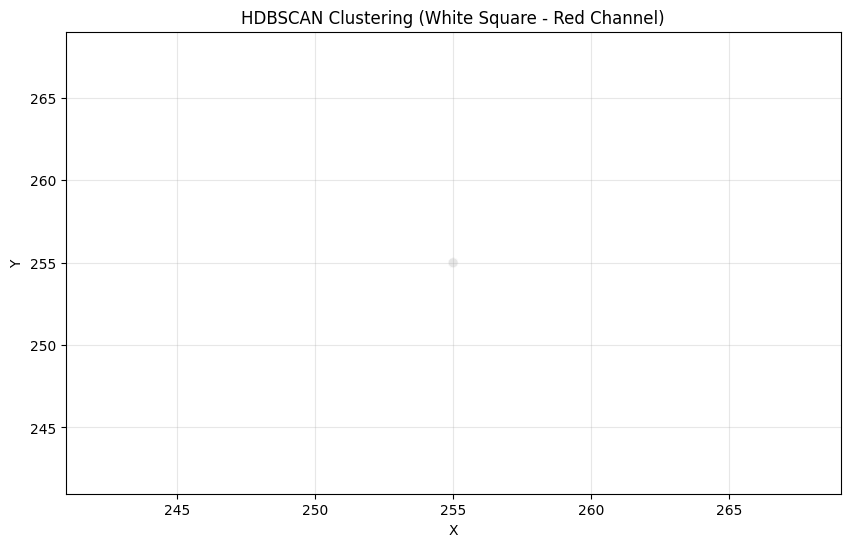

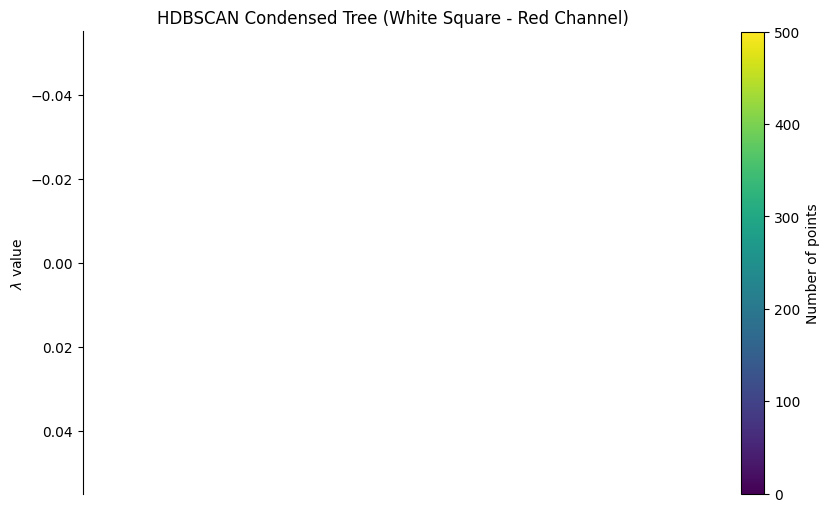


Cluster Membership:
-1    500
Name: count, dtype: int64

Noise Points: 100.00%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/whitesquareR.csv", delimiter=",")

# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=20,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# Plot clusters
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [palette[col] if col >= 0 else (0.9, 0.9, 0.9) for col in clusterer.labels_]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering (White Square - Red Channel)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()

# Plot condensed tree
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8)
)
plt.title('HDBSCAN Condensed Tree (White Square - Red Channel)')
plt.show()

# Basic cluster stats
print("\nCluster Membership:")
print(pd.Series(clusterer.labels_).value_counts())
print(f"\nNoise Points: {(clusterer.labels_ == -1).mean()*100:.2f}%")

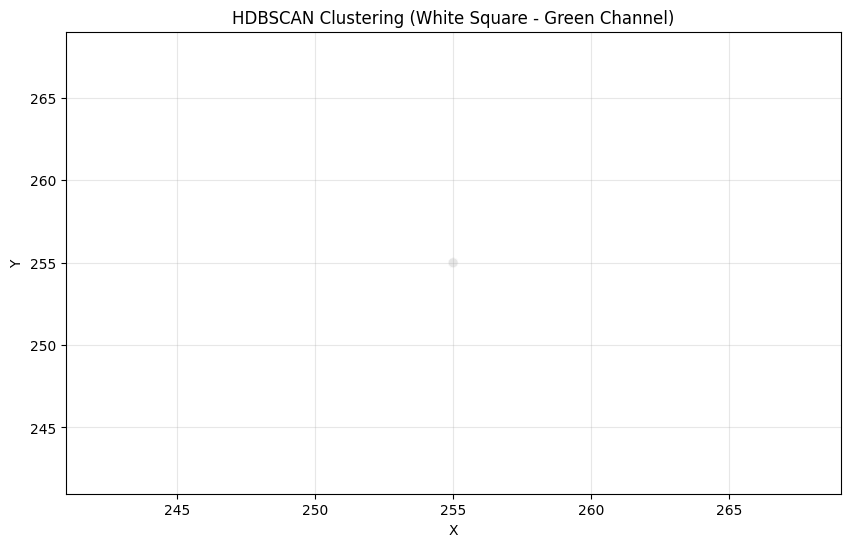

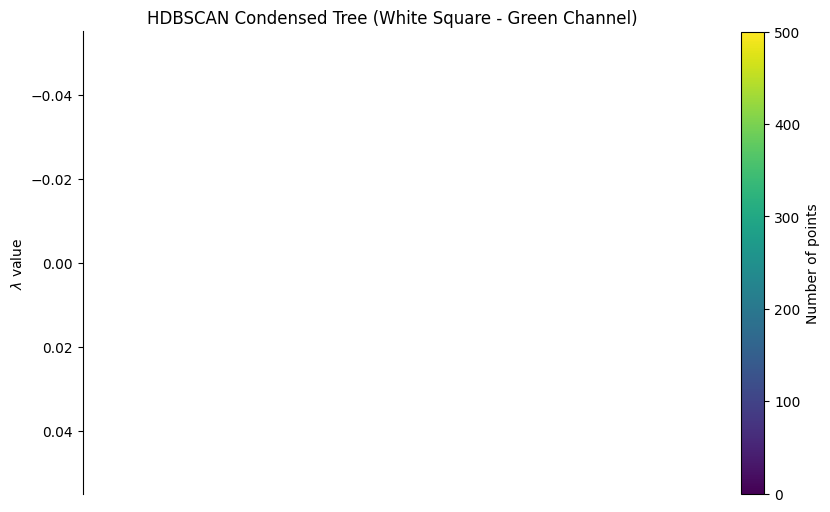


Cluster Membership:
-1    500
Name: count, dtype: int64

Noise Points: 100.00%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/whitesquareG.csv", delimiter=",")

# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=20,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# Plot clusters
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [palette[col] if col >= 0 else (0.9, 0.9, 0.9) for col in clusterer.labels_]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering (White Square - Green Channel)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()

# Plot condensed tree
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8)
)
plt.title('HDBSCAN Condensed Tree (White Square - Green Channel)')
plt.show()

# Basic cluster stats
print("\nCluster Membership:")
print(pd.Series(clusterer.labels_).value_counts())
print(f"\nNoise Points: {(clusterer.labels_ == -1).mean()*100:.2f}%")

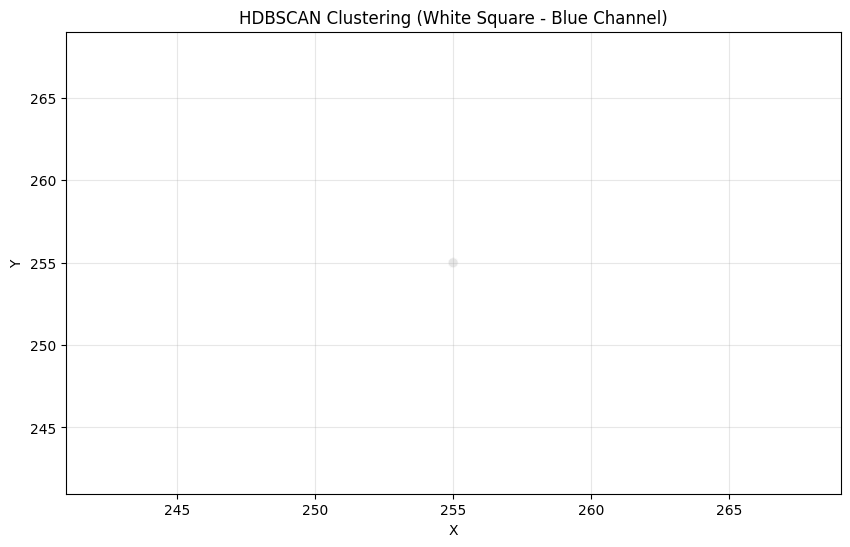

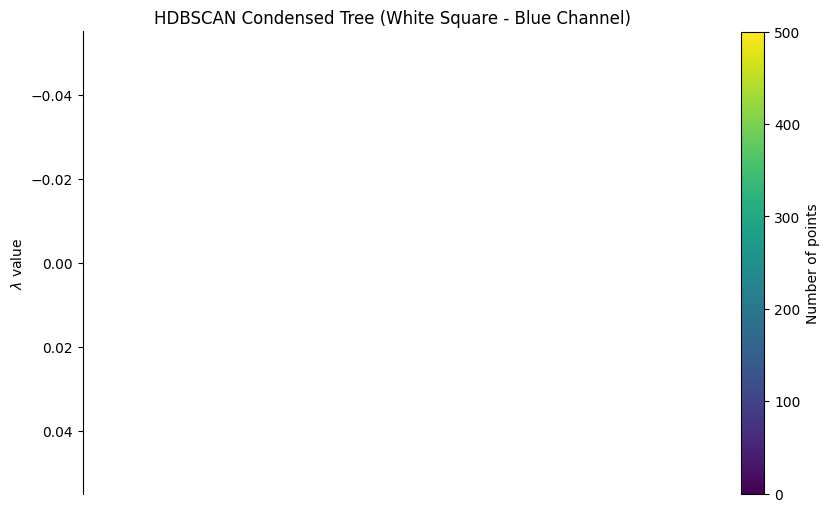


Cluster Membership:
-1    500
Name: count, dtype: int64

Noise Points: 100.00%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/whitesquareB.csv", delimiter=",")

# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=20,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# Plot clusters
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [palette[col] if col >= 0 else (0.9, 0.9, 0.9) for col in clusterer.labels_]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering (White Square - Blue Channel)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, alpha=0.3)
plt.show()

# Plot condensed tree
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8)
)
plt.title('HDBSCAN Condensed Tree (White Square - Blue Channel)')
plt.show()

# Basic cluster stats
print("\nCluster Membership:")
print(pd.Series(clusterer.labels_).value_counts())
print(f"\nNoise Points: {(clusterer.labels_ == -1).mean()*100:.2f}%")

## Attempt to Deconvolute Columbia Lion

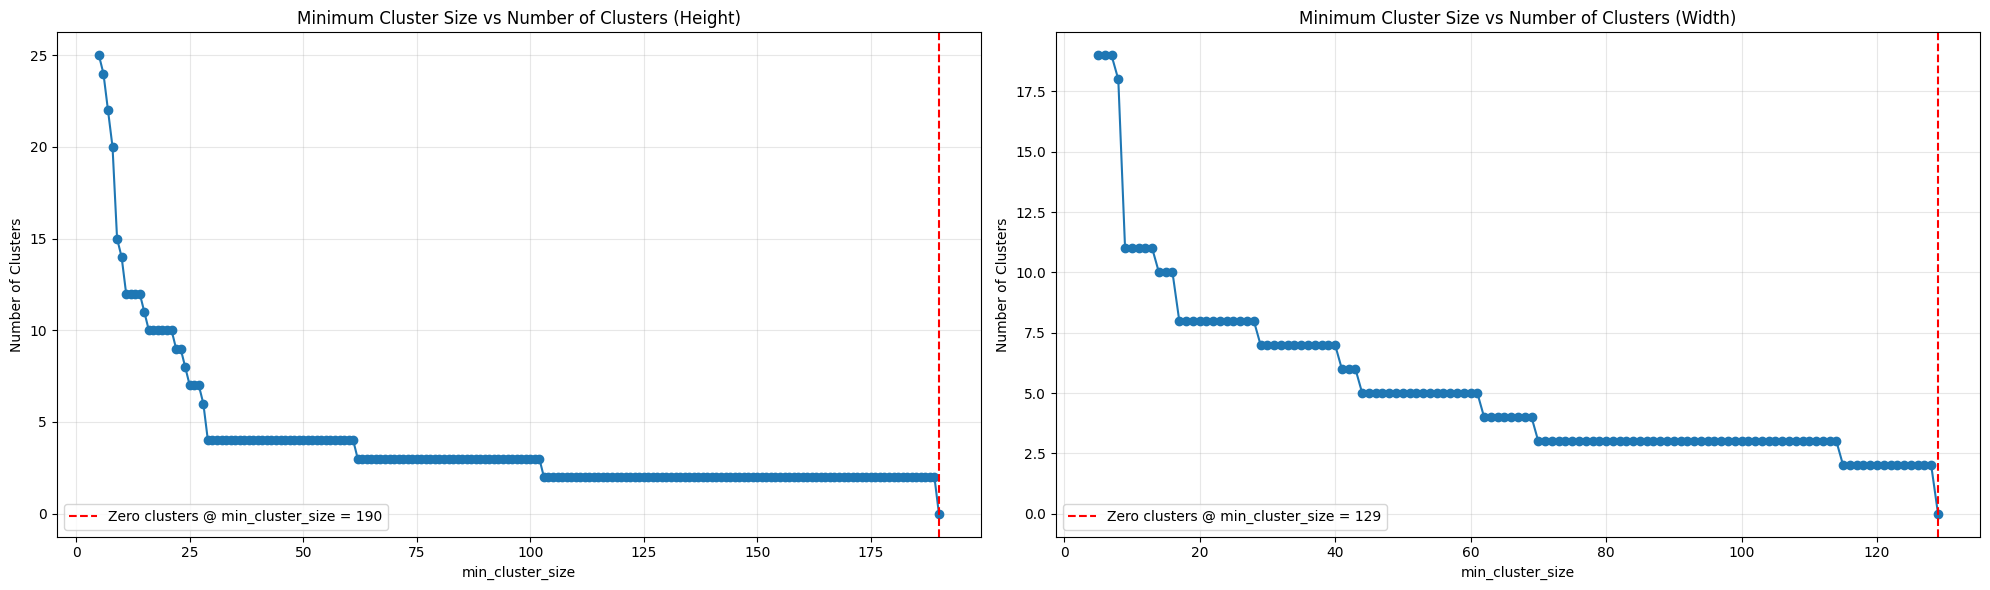

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/Lion_B - Lion_B.csv", delimiter=",")
projection_t = projection.T

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# First plot (Height)
# Initialize tracking lists
min_cluster_sizes_height = []
n_clusters_height = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_height.append(size)
    n_clusters_height.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax1.plot(min_cluster_sizes_height, n_clusters_height, marker='o', linestyle='-')
ax1.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax1.set_title('Minimum Cluster Size vs Number of Clusters (Height)')
ax1.set_xlabel('min_cluster_size')
ax1.set_ylabel('Number of Clusters')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Second plot (Width)
# Initialize tracking lists
min_cluster_sizes_width = []
n_clusters_width = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection_t)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_width.append(size)
    n_clusters_width.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax2.plot(min_cluster_sizes_width, n_clusters_width, marker='o', linestyle='-')
ax2.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax2.set_title('Minimum Cluster Size vs Number of Clusters (Width)')
ax2.set_xlabel('min_cluster_size')
ax2.set_ylabel('Number of Clusters')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Rectangle

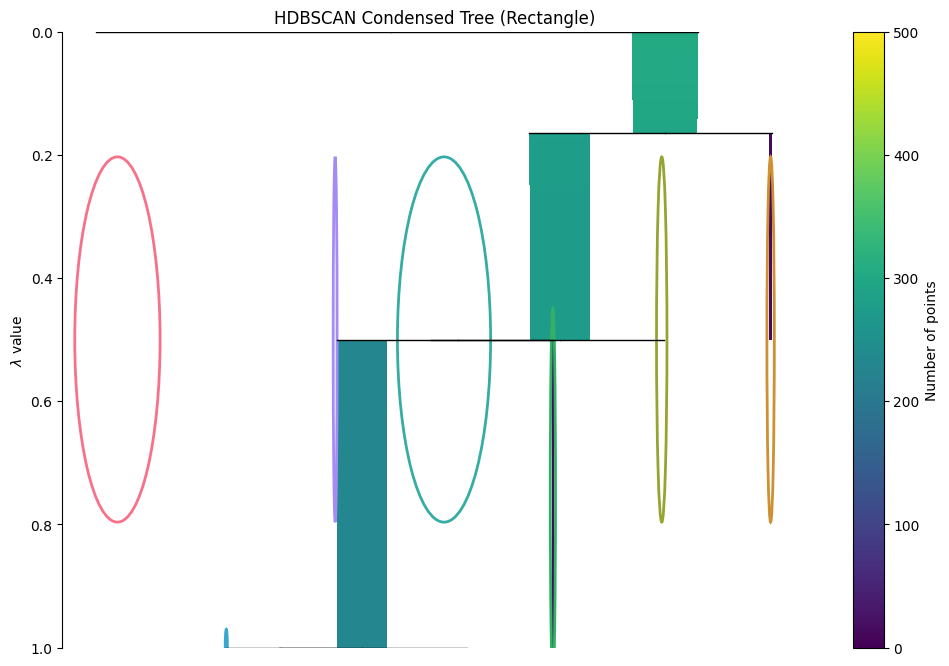


Cluster Membership:
 4    214
 0    196
 2     24
-1     23
 1     17
 3     12
 6      9
 5      5
Name: count, dtype: int64

Noise Points: 4.60%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/BlackRectangle_B - BlackRectangle_B.csv",
                        delimiter=",")
projection_t = projection.T

# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection_t)

# Plot clusters
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [palette[col] if col >= 0 else (0.9, 0.9, 0.9) for col in clusterer.labels_]

# Plot condensed tree
plt.figure(figsize=(12, 8))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8)
)
plt.title('HDBSCAN Condensed Tree (Rectangle)')
plt.show()

# Basic cluster stats
print("\nCluster Membership:")
print(pd.Series(clusterer.labels_).value_counts())
print(f"\nNoise Points: {(clusterer.labels_ == -1).mean()*100:.2f}%")

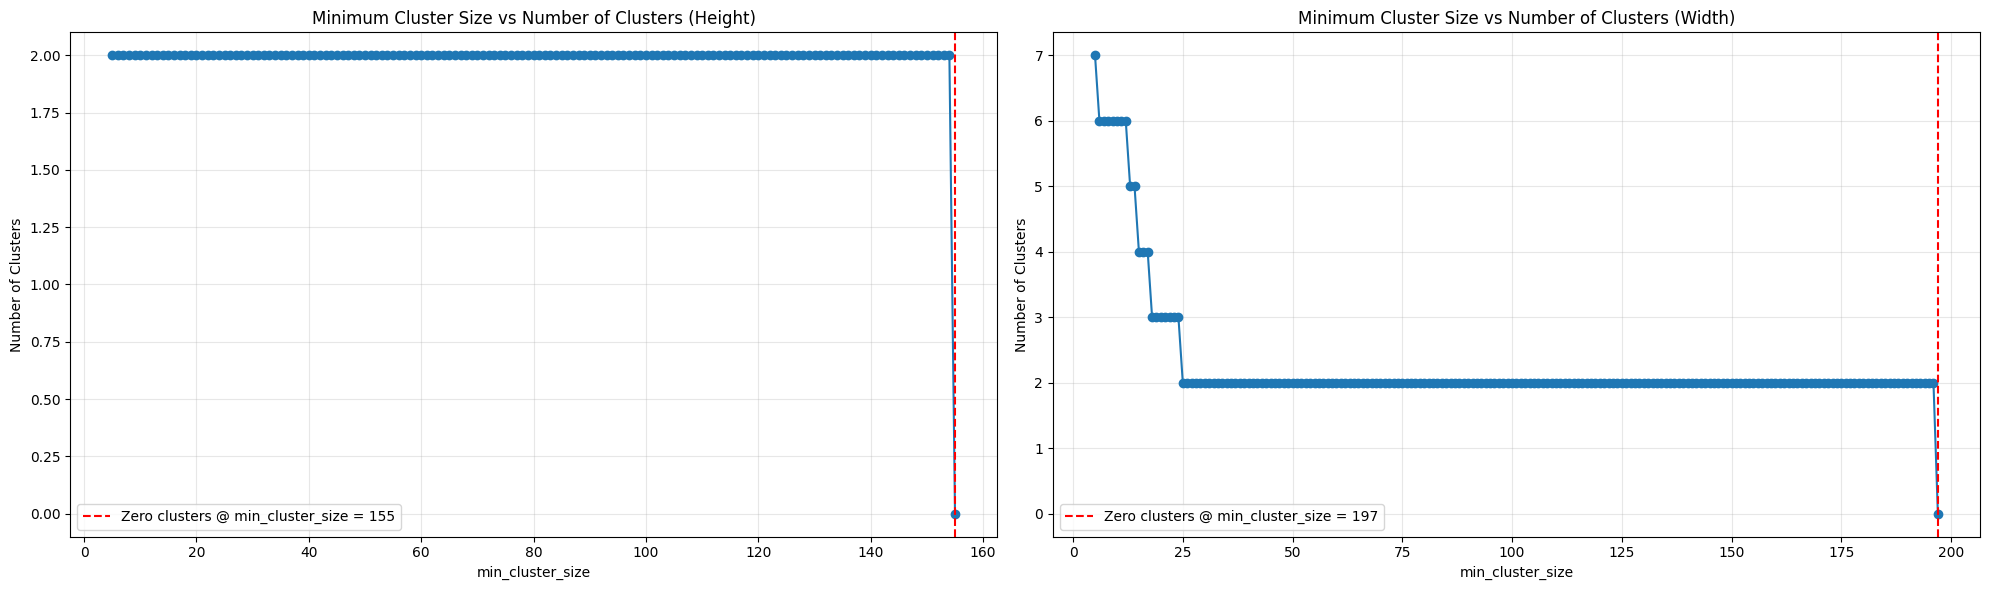

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/BlackRectangle_B - BlackRectangle_B.csv", delimiter=",")
projection_t = projection.T

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# First plot (Height)
# Initialize tracking lists
min_cluster_sizes_height = []
n_clusters_height = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_height.append(size)
    n_clusters_height.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax1.plot(min_cluster_sizes_height, n_clusters_height, marker='o', linestyle='-')
ax1.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax1.set_title('Minimum Cluster Size vs Number of Clusters (Height)')
ax1.set_xlabel('min_cluster_size')
ax1.set_ylabel('Number of Clusters')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Second plot (Width)
# Initialize tracking lists
min_cluster_sizes_width = []
n_clusters_width = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection_t)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_width.append(size)
    n_clusters_width.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax2.plot(min_cluster_sizes_width, n_clusters_width, marker='o', linestyle='-')
ax2.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax2.set_title('Minimum Cluster Size vs Number of Clusters (Width)')
ax2.set_xlabel('min_cluster_size')
ax2.set_ylabel('Number of Clusters')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Use Case: Blurry Images

## Semi-Circle 1

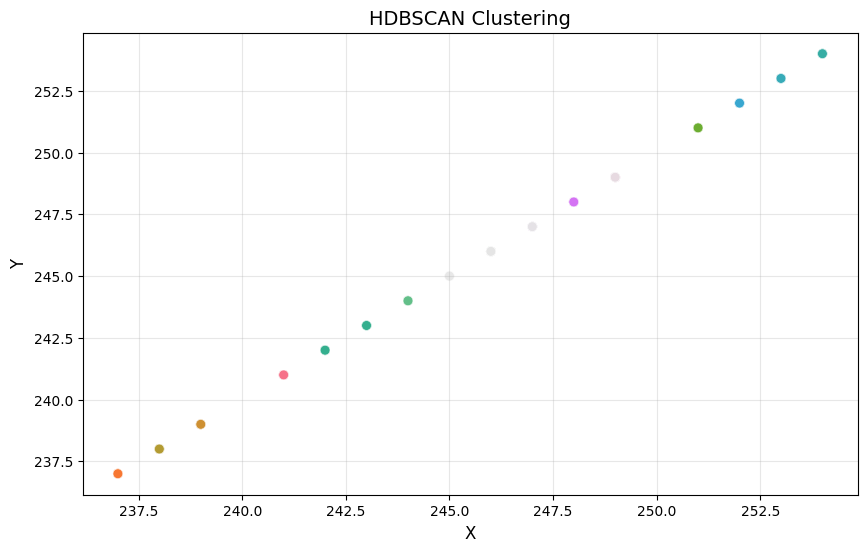

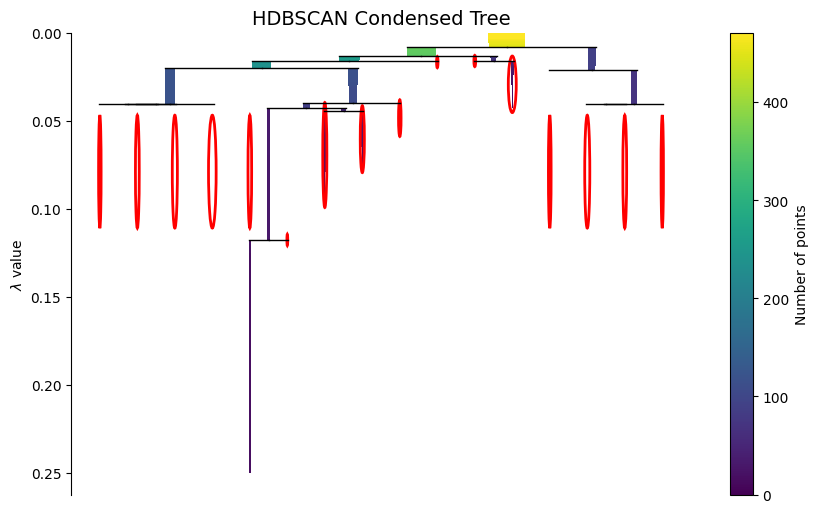


Cluster Membership:
-1     97
 7     50
 5     48
 2     32
 10    32
 13    26
 12    26
 3     24
 9     24
 14    23
 0     17
 8     16
 11    16
 1     15
 6     11
 4      9
 15     5
Name: count, dtype: int64

Noise Points: 20.59%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# --- Load Data ---
projection = np.loadtxt("/content/blurry_semi_B - blurry_semi_B.csv", delimiter=",")

# --- Clustering ---
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# --- Plot Clusters ---
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [
    palette[col] if col >= 0 else (0.9, 0.9, 0.9)
    for col in clusterer.labels_
]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# --- Condensed Tree (for Stability Analysis) ---
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8),
)
plt.title('HDBSCAN Condensed Tree', fontsize=14)
plt.show()

# --- Additional Diagnostics ---
# Print cluster statistics
cluster_stats = pd.Series(clusterer.labels_).value_counts()
print("\nCluster Membership:")
print(cluster_stats)

# Check % of noise points
noise_ratio = (clusterer.labels_ == -1).mean() * 100
print(f"\nNoise Points: {noise_ratio:.2f}%")

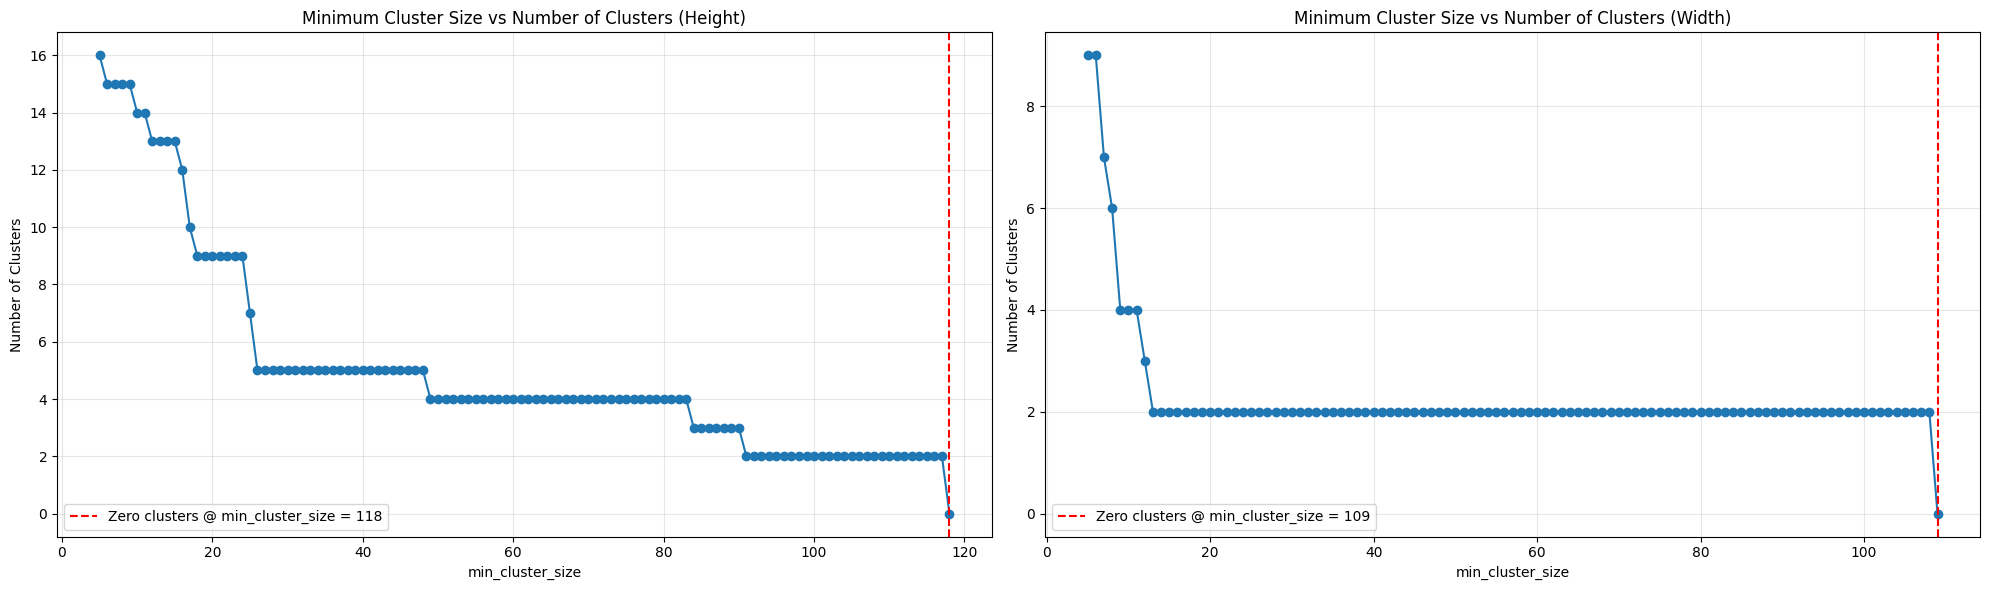

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/blurry_semi_B - blurry_semi_B.csv", delimiter=",")
projection_t = projection.T

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# First plot (Height)
# Initialize tracking lists
min_cluster_sizes_height = []
n_clusters_height = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_height.append(size)
    n_clusters_height.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax1.plot(min_cluster_sizes_height, n_clusters_height, marker='o', linestyle='-')
ax1.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax1.set_title('Minimum Cluster Size vs Number of Clusters (Height)')
ax1.set_xlabel('min_cluster_size')
ax1.set_ylabel('Number of Clusters')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Second plot (Width)
# Initialize tracking lists
min_cluster_sizes_width = []
n_clusters_width = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection_t)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_width.append(size)
    n_clusters_width.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax2.plot(min_cluster_sizes_width, n_clusters_width, marker='o', linestyle='-')
ax2.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax2.set_title('Minimum Cluster Size vs Number of Clusters (Width)')
ax2.set_xlabel('min_cluster_size')
ax2.set_ylabel('Number of Clusters')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Semi-Circle 2

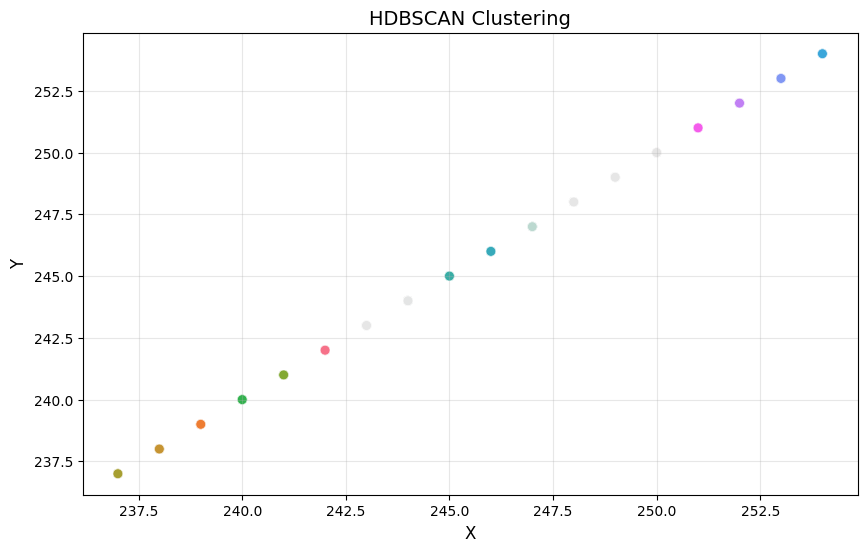

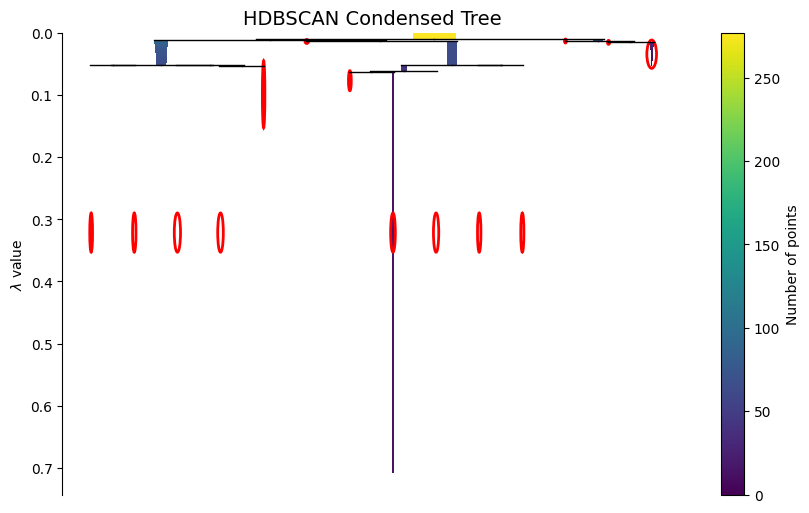


Cluster Membership:
-1     94
 8     31
 11    20
 12    18
 1     17
 5     15
 10    11
 2     11
 0     11
 3     10
 9      9
 4      9
 13     8
 7      7
 6      6
Name: count, dtype: int64

Noise Points: 33.94%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# --- Load Data ---
projection = np.loadtxt("/content/blurred_semi_2_B - blurred_semi_2_B.csv", delimiter=",")

# --- Clustering ---
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# --- Plot Clusters ---
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [
    palette[col] if col >= 0 else (0.9, 0.9, 0.9)
    for col in clusterer.labels_
]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# --- Condensed Tree (for Stability Analysis) ---
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8),
)
plt.title('HDBSCAN Condensed Tree', fontsize=14)
plt.show()

# --- Additional Diagnostics ---
# Print cluster statistics
cluster_stats = pd.Series(clusterer.labels_).value_counts()
print("\nCluster Membership:")
print(cluster_stats)

# Check % of noise points
noise_ratio = (clusterer.labels_ == -1).mean() * 100
print(f"\nNoise Points: {noise_ratio:.2f}%")

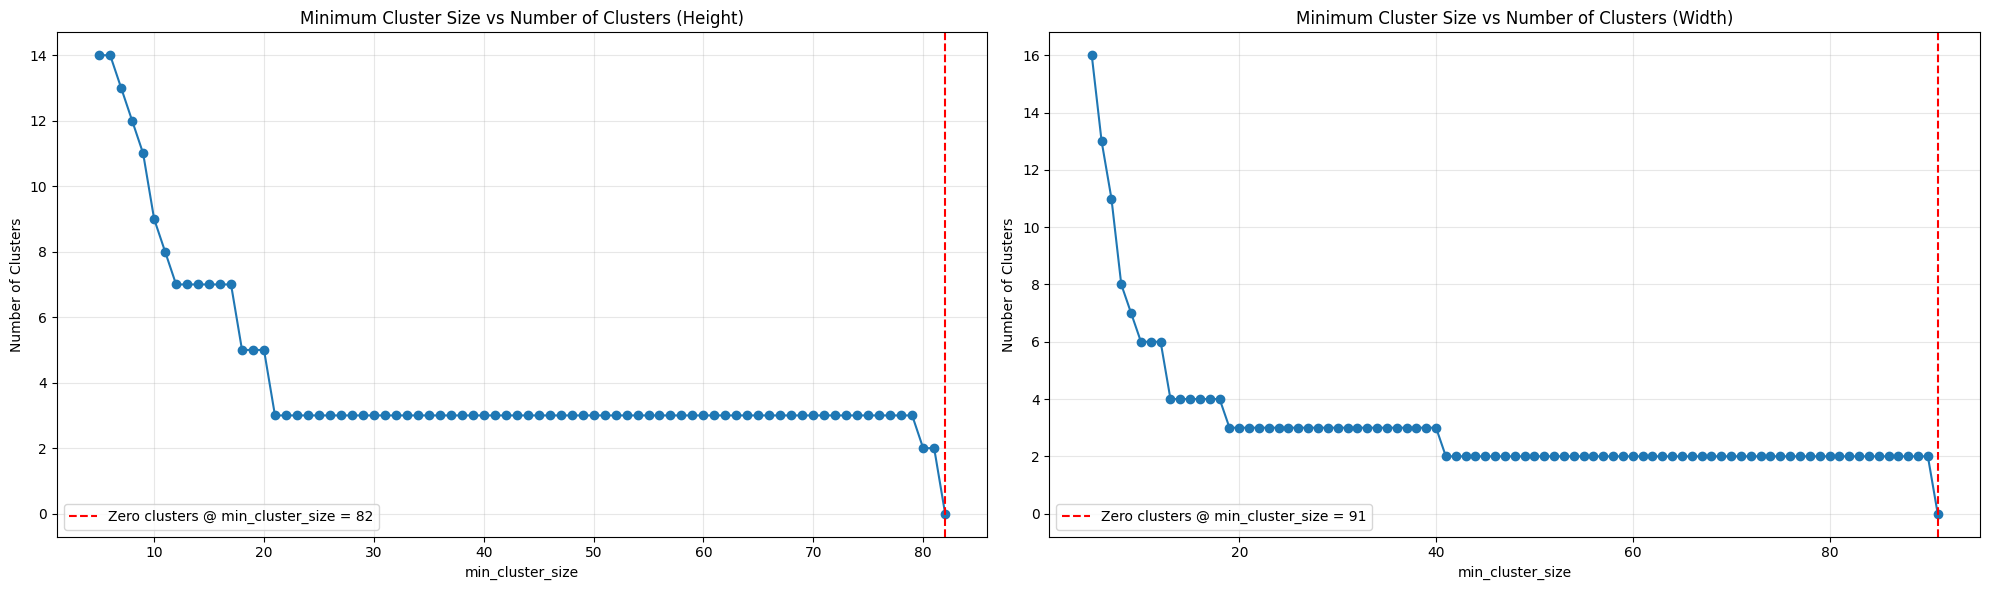

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/blurred_semi_2_B - blurred_semi_2_B.csv",
                        delimiter=",")
projection_t = projection.T

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# First plot (Height)
# Initialize tracking lists
min_cluster_sizes_height = []
n_clusters_height = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_height.append(size)
    n_clusters_height.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax1.plot(min_cluster_sizes_height, n_clusters_height, marker='o', linestyle='-')
ax1.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax1.set_title('Minimum Cluster Size vs Number of Clusters (Height)')
ax1.set_xlabel('min_cluster_size')
ax1.set_ylabel('Number of Clusters')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Second plot (Width)
# Initialize tracking lists
min_cluster_sizes_width = []
n_clusters_width = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection_t)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_width.append(size)
    n_clusters_width.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax2.plot(min_cluster_sizes_width, n_clusters_width, marker='o', linestyle='-')
ax2.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax2.set_title('Minimum Cluster Size vs Number of Clusters (Width)')
ax2.set_xlabel('min_cluster_size')
ax2.set_ylabel('Number of Clusters')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Oval

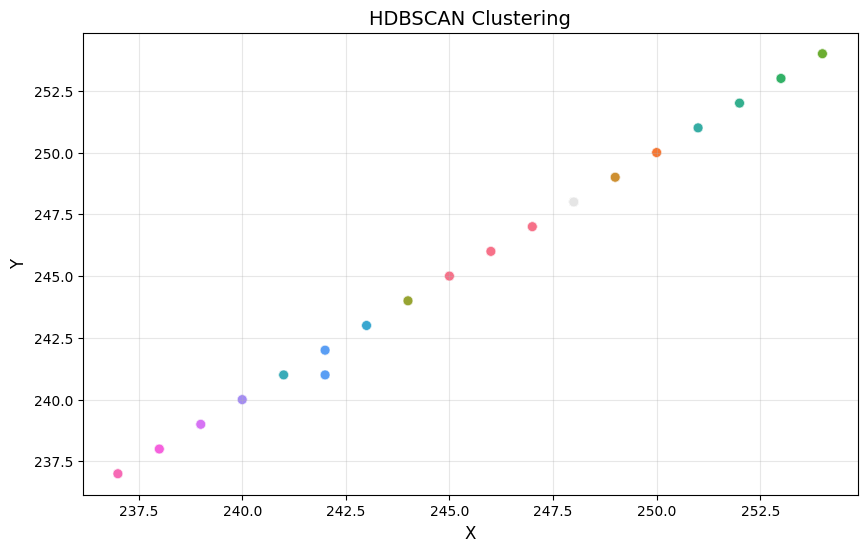

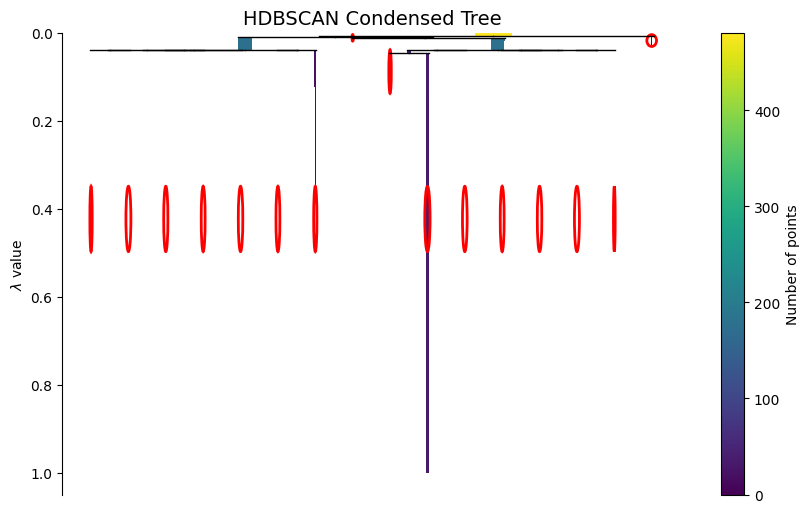


Cluster Membership:
 0     62
-1     59
 11    34
 14    32
 6     32
 9     30
 1     29
 13    29
 7     27
 2     25
 12    25
 8     25
 3     21
 10    16
 5     15
 15    11
 4      9
Name: count, dtype: int64

Noise Points: 12.27%


In [ ]:
import hdbscan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# --- Load Data ---
projection = np.loadtxt("/content/blurry_oval_3_B - blurry_oval_3_B.csv", delimiter=",")

# --- Clustering ---
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=5,
    min_samples=5,
    cluster_selection_method='eom',
    gen_min_span_tree=True
)
clusterer.fit(projection)

# --- Plot Clusters ---
palette = sns.color_palette("husl", np.unique(clusterer.labels_).max() + 1)
cluster_colors = [
    palette[col] if col >= 0 else (0.9, 0.9, 0.9)
    for col in clusterer.labels_
]

plt.figure(figsize=(10, 6))
plt.scatter(
    projection[:, 0], projection[:, 1],
    c=cluster_colors,
    s=50,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)
plt.title('HDBSCAN Clustering', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# --- Condensed Tree (for Stability Analysis) ---
plt.figure(figsize=(10, 6))
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette("husl", 8),
)
plt.title('HDBSCAN Condensed Tree', fontsize=14)
plt.show()

# --- Additional Diagnostics ---
# Print cluster statistics
cluster_stats = pd.Series(clusterer.labels_).value_counts()
print("\nCluster Membership:")
print(cluster_stats)

# Check % of noise points
noise_ratio = (clusterer.labels_ == -1).mean() * 100
print(f"\nNoise Points: {noise_ratio:.2f}%")

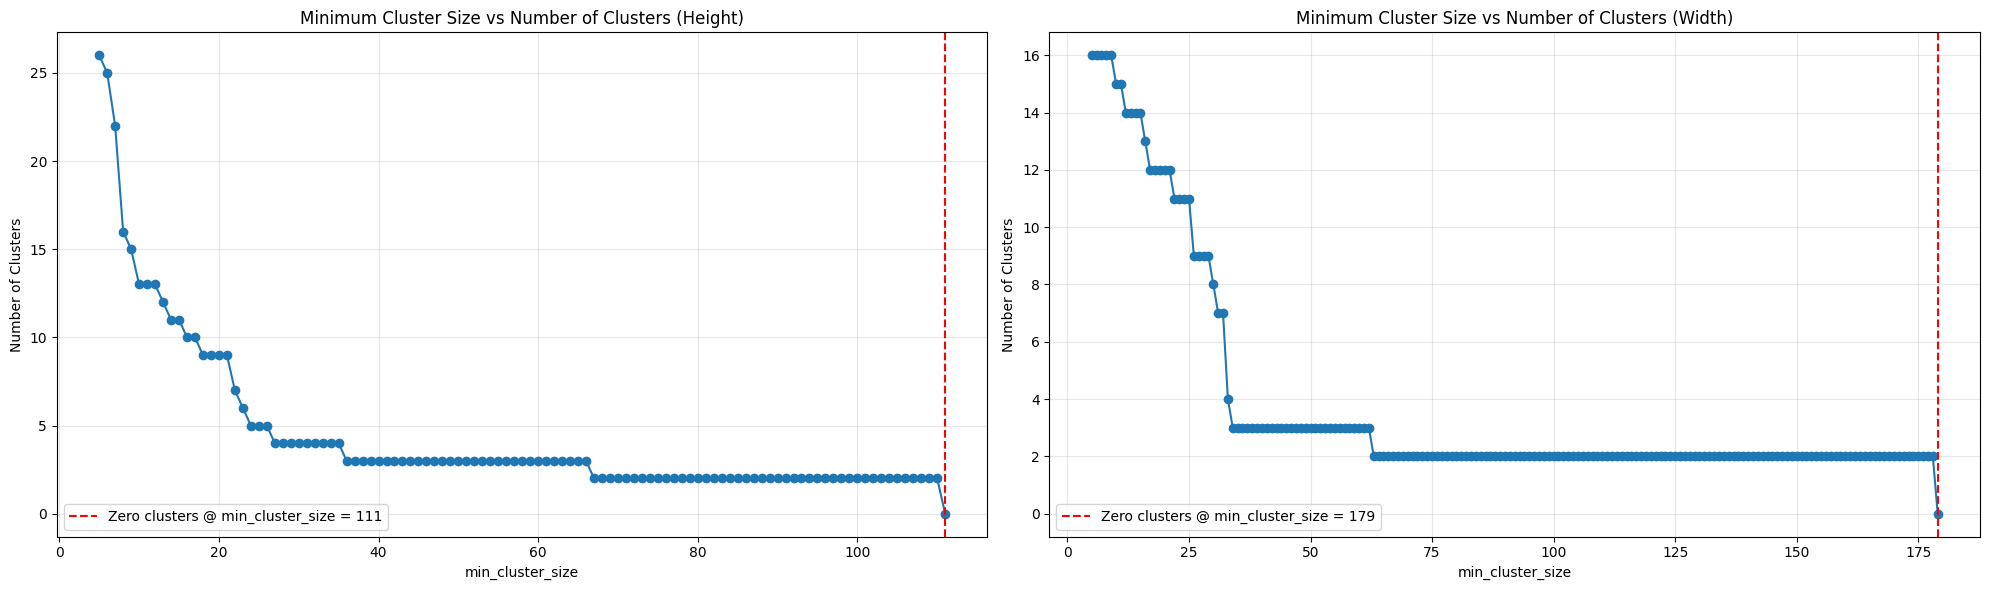

In [ ]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data
projection = np.loadtxt("/content/blurry_oval_3_B - blurry_oval_3_B.csv",
                        delimiter=",")
projection_t = projection.T

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# First plot (Height)
# Initialize tracking lists
min_cluster_sizes_height = []
n_clusters_height = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection_t)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_height.append(size)
    n_clusters_height.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax1.plot(min_cluster_sizes_height, n_clusters_height, marker='o', linestyle='-')
ax1.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax1.set_title('Minimum Cluster Size vs Number of Clusters (Height)')
ax1.set_xlabel('min_cluster_size')
ax1.set_ylabel('Number of Clusters')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Second plot (Width)
# Initialize tracking lists
min_cluster_sizes_width = []
n_clusters_width = []
# Start sweep
size = 5
while True:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=size,
        min_samples=5,
        cluster_selection_method='eom'
    )
    clusterer.fit(projection)
    labels = clusterer.labels_
    num_clusters = len(set(labels) - {-1})

    min_cluster_sizes_width.append(size)
    n_clusters_width.append(num_clusters)

    if num_clusters == 0:
        break
    size += 1

ax2.plot(min_cluster_sizes_width, n_clusters_width, marker='o', linestyle='-')
ax2.axvline(size, color='red', linestyle='--', label=f"Zero clusters @ min_cluster_size = {size}")
ax2.set_title('Minimum Cluster Size vs Number of Clusters (Width)')
ax2.set_xlabel('min_cluster_size')
ax2.set_ylabel('Number of Clusters')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()